<a href="https://colab.research.google.com/github/bild12/EspIA/blob/main/preprocesamiento_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Sistemas basados en reglas**
**Preparacion de Datos**

**Especialización en Inteligencia Artificial**

**Pontificia Universidad Javeriana**

GRUPO 2
---
Integrantes:

*  Jorge Manuel Diaz Guzman - jm.diaz@javeriana.edu.co
*  Bibiana Ivette Lopez Dominguez - lopezdbi@javeriana.edu.co
*  Edgar Sebasatian Fonseca Rodriguez - esebastian.fonsecar@javeriana.edu.co
*  Esteban David Perez Alvarez - ed.perez@javeriana.edu.co
*  Santiago Perez Siachoque - sperezs@javeriana.edu.co

## Descripción

Desarrollo del taller
Genera una pirámide Gaussiana a partir de la imagen original, calculando 3 niveles más
pequeños y otros 3 niveles más grandes, de acuerdo con las operaciones reseñadas en la
página
https://docs.opencv.org/master/d4/d1f/tutorial_pyramids.html.
Debes almacenar las 7 imágenes de la pirámide en disco con numeración sucesiva para
facilitar la visualización. Para un mejor (y más sencillo) resultado, te sugerimos utilizar
imágenes de tamaño cuadrado en potencias de 2 (recomendado 512x512).
Tomado de http://cs.haifa.ac.il/hagit/courses/ip/Lectures/Ip11_MultiscaleRepx4.pdf
Adicionalmente, genera una pirámide Laplaciana, a partir de la pirámide Gaussiana
anterior, nuevamente en 7 niveles, partiendo de la imagen en su versión más pequeña y
almacenando en cada nivel superior la diferencia con el siguiente nivel.
Las 7 imágenes de la pirámide Laplaciana deben almacenarse en disco con numeración
sucesiva (y que pueda diferenciarse de la pirámide Gaussiana) para facilitar la
visualización.

- El programa debe :
  - [ ] Lectura de la imagen original.
  - [ ] Generación de la pirámide Gaussiana.
  - [ ] Generación de la pirámide Laplaciana.
  - [ ] Validación y visualización.

## Requerimientos

### Importar módulos

In [ ]:
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow

## Lectura de la imagen original

File ‘statue_noisy.jpg’ already there; not retrieving.



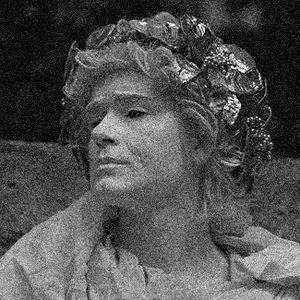

In [ ]:
# descargar la imagen
!wget -nc https://www.dropbox.com/s/ig5p03qk2p30bgq/statue_noisy.jpg

# leer la imagen y visualizarla
img = cv.imread("statue_noisy.jpg", cv.IMREAD_GRAYSCALE)


if img is None:
  print ('Error opening image!')
  print ('Usage: pyramids.py [image_name -- default ../data/chicky_512.png] \n')
  sys.exit(-1)

cv2_imshow(img)

### Redimencionar la imagen

In [ ]:
# Obtener las dimensiones de la imagen
height, width = img.shape[:2]
print(height, width)

# Verificar si la imagen es cuadrada y tiene dimensiones en potencias de 2
if height != width or (height & (height - 1)) != 0:
    # Redimensionar la imagen a 512x512
    img = cv.resize(img, (512, 512))


512 512


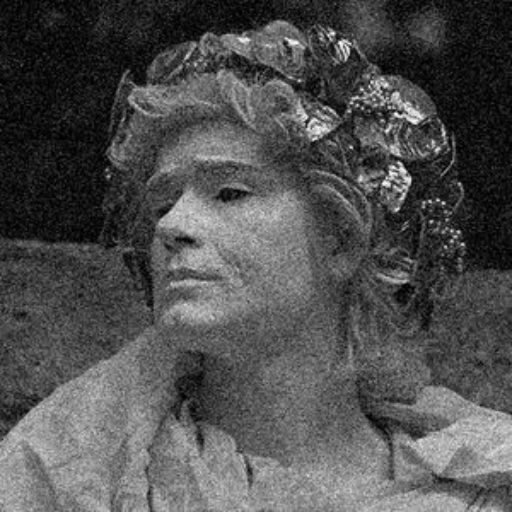

512 512


In [ ]:
# Mostrar la imagen cargada y redimensionada
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()
print(height, width)

## Generación de la pirámide Gaussiana

In [ ]:
# Crear una lista para almacenar los niveles de la pirámide Gaussiana
pyramid = []

# Nivel 0: Guardar la imagen original como el primer nivel de la pirámide
pyramid.append(img)

# Generar 3 niveles más pequeños aplicando cv2.pyrDown
for i in range(1, 4):
    img = cv.pyrDown(img)
    pyramid.append(img)
    # Guardar cada nivel con un nombre indicativo
    cv.imwrite(f'nivel_{i}.jpg', img)

Nivel 0


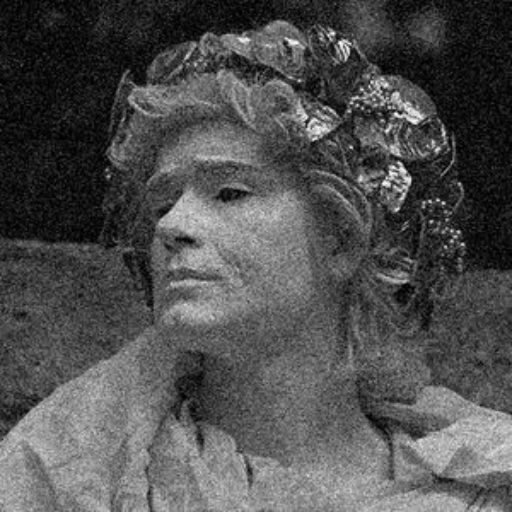

Nivel 1


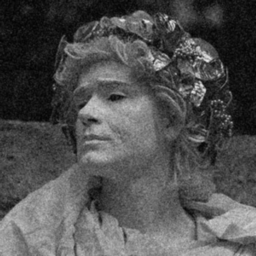

Nivel 2


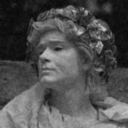

Nivel 3


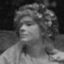

In [ ]:
# Mostrar todos los niveles de la pirámide
for i, level in enumerate(pyramid):
    print(f'Nivel {i}')
    cv2_imshow(level)

In [ ]:
# Generar 3 niveles más grandes aplicando cv2.pyrUp
for i in range(1, 4):
    img = cv.pyrUp(img)
    pyramid.append(img)
    # Guardar cada nivel con un nombre indicativo
    cv.imwrite(f'nivel_{i}.jpg', img)

Nivel 0


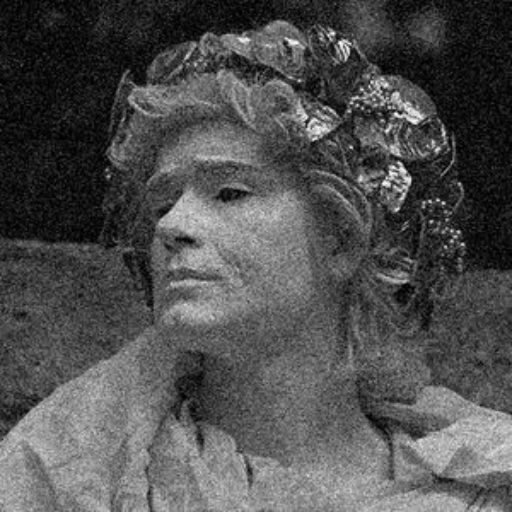

Nivel 1


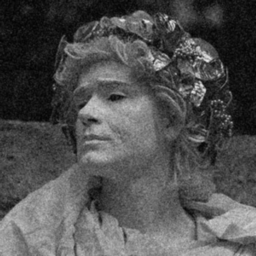

Nivel 2


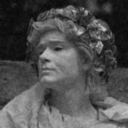

Nivel 3


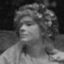

Nivel 4


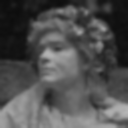

Nivel 5


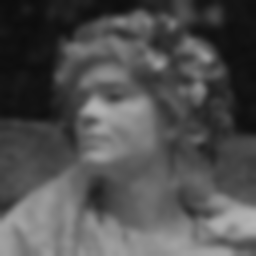

Nivel 6


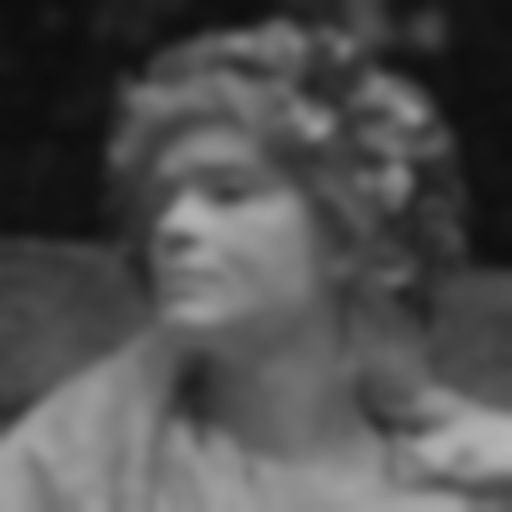

In [ ]:
# Mostrar todos los niveles de la pirámide
for i, level in enumerate(pyramid):
    print(f'Nivel {i}')
    cv2_imshow(level)

##  Generación de la pirámide Laplaciana.

In [ ]:
# Crear una lista para almacenar los niveles de la pirámide Laplaciana
laplacian_pyramid = []

# Generar la pirámide Laplaciana
for i in range(3, 0, -1):
    gaussian_expanded = cv.pyrUp(pyramid[i])
    # Asegurarse de que las dimensiones coincidan
    gaussian_expanded = cv.resize(gaussian_expanded, (pyramid[i-1].shape[1], pyramid[i-1].shape[0]))
    laplacian = cv.subtract(pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)
    # Guardar cada nivel con un nombre indicativo
    cv.imwrite(f'laplacian_nivel_{i}.jpg', laplacian)

Nivel 0


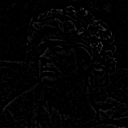

Nivel 1


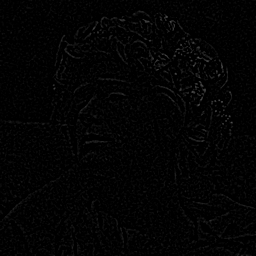

Nivel 2


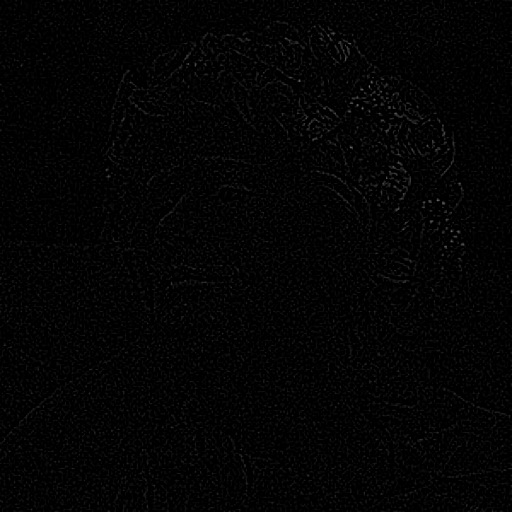

Nivel 3


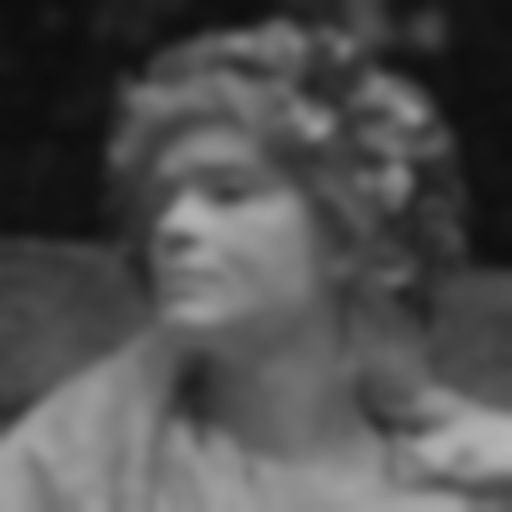

In [ ]:
# Agregar el último nivel de la pirámide Gaussiana a la pirámide Laplaciana
laplacian_pyramid.append(pyramid[-1])
cv.imwrite('laplacian_nivel_0.jpg', pyramid[-1])

# Mostrar todos los niveles de la pirámide Laplaciana
for i, level in enumerate(laplacian_pyramid):
    print(f'Nivel {i}')
    cv2_imshow(level)

In [ ]:
# Visualizar las pirámides
def visualize_pyramid(pyramid, pyramid_type):
    for i, level in enumerate(pyramid):
        print(f'{pyramid_type} Nivel {i}')
        cv2_imshow(level)

Visualizando pirámide Gaussiana...
Gaussiana Nivel 0


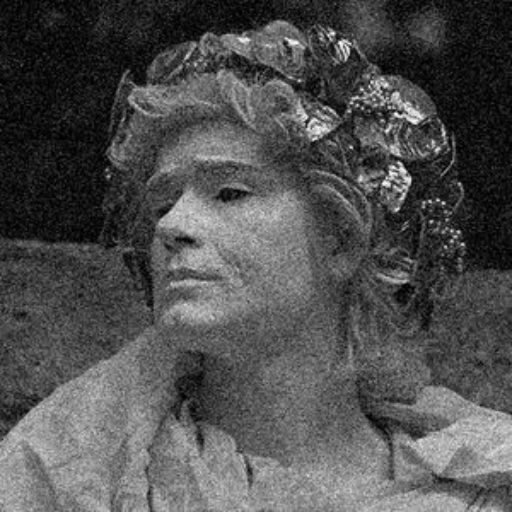

Gaussiana Nivel 1


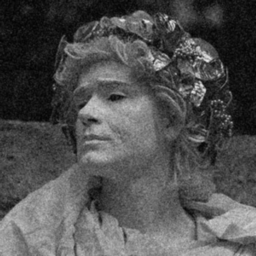

Gaussiana Nivel 2


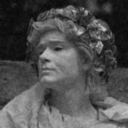

Gaussiana Nivel 3


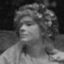

Gaussiana Nivel 4


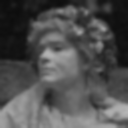

Gaussiana Nivel 5


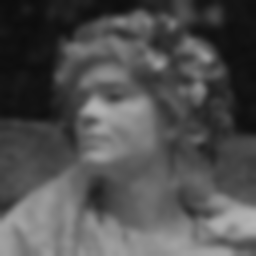

Gaussiana Nivel 6


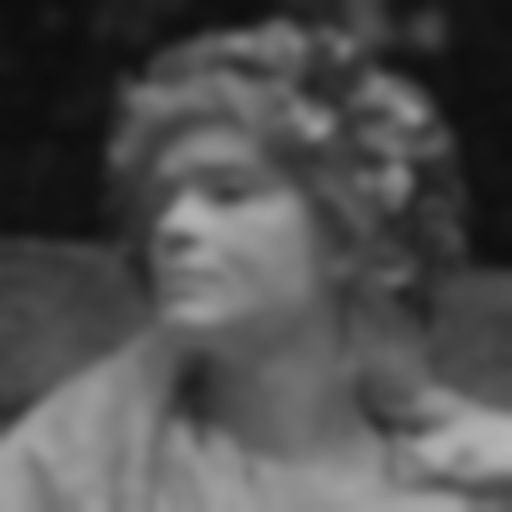

In [ ]:
print("Visualizando pirámide Gaussiana...")
visualize_pyramid(pyramid, 'Gaussiana')